In [30]:
import numpy as np
import pandas as pd

In [31]:
# For the reading of customer dataset read 
customers_df = pd.read_csv(r'c:\Users\siddh\OneDrive\Desktop\internship\zeotap\Customers.csv')
customers_df.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [32]:
#For the reading of transaction data read
transactions_df = pd.read_csv(r'C:\Users\siddh\OneDrive\Desktop\internship\zeotap\Transactions.csv')
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [33]:
# For the reading of product dataset read 
products_df = pd.read_csv(r'C:\Users\siddh\OneDrive\Desktop\internship\zeotap\Products.csv')
products_df.head()


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


For check the information about the all datasets 

In [34]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [36]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [37]:
# For check the missing values in the datasets
customers_missing = customers_df.isnull().sum()
products_missing = products_df.isnull().sum()
transactions_missing = transactions_df.isnull().sum()
(customers_missing,
products_missing, 
transactions_missing)

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64)

In [38]:
# Converting date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [39]:
# Validating relationships between datasets

# Check if all CustomerIDs in Transactions are in Customers
customer_id_check = transactions_df['CustomerID'].isin(customers_df['CustomerID']).all()

# Check if all ProductIDs in Transactions are in Products
product_id_check = transactions_df['ProductID'].isin(products_df['ProductID']).all()

In [40]:
# Check for duplicate entries in each dataset
customers_duplicates = customers_df.duplicated().sum()
products_duplicates = products_df.duplicated().sum()
transactions_duplicates = transactions_df.duplicated().sum()

In [41]:
# Summary of the checks

cleaning_summary = {
    "CustomerID_Check": customer_id_check,
    "ProductID_Check": product_id_check,
    "Customers_Duplicates": customers_duplicates,
    "Products_Duplicates": products_duplicates,
    "Transactions_Duplicates": transactions_duplicates,
}

cleaning_summary

{'CustomerID_Check': np.True_,
 'ProductID_Check': np.True_,
 'Customers_Duplicates': np.int64(0),
 'Products_Duplicates': np.int64(0),
 'Transactions_Duplicates': np.int64(0)}

Data visualization as per Datasets

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Setting a visual style
sns.set_theme(style="whitegrid")

C:\Users\siddh\AppData\Local\Temp\ipykernel_34388\1444742751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


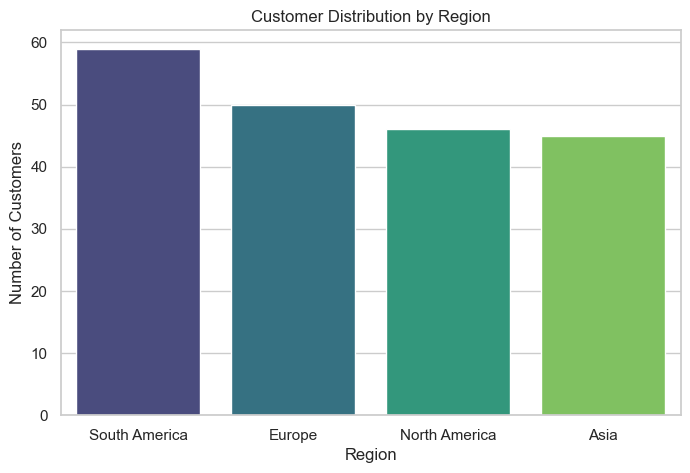

In [44]:
# Customer distribution by region
region_counts = customers_df['Region'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

C:\Users\siddh\AppData\Local\Temp\ipykernel_34388\903150900.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")


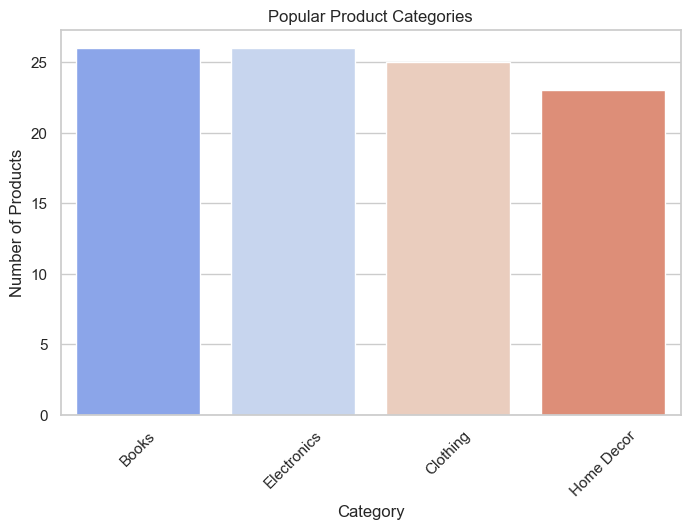

In [45]:
# Popular product categories
category_counts = products_df['Category'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.title("Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

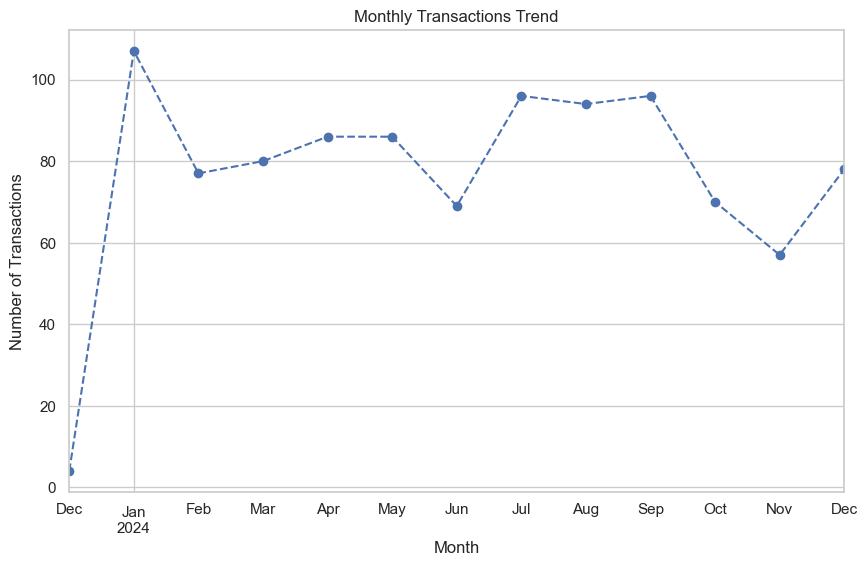

In [46]:
# Transactions over time
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions_df.groupby('TransactionMonth').size()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='b', linestyle='--')
plt.title("Monthly Transactions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

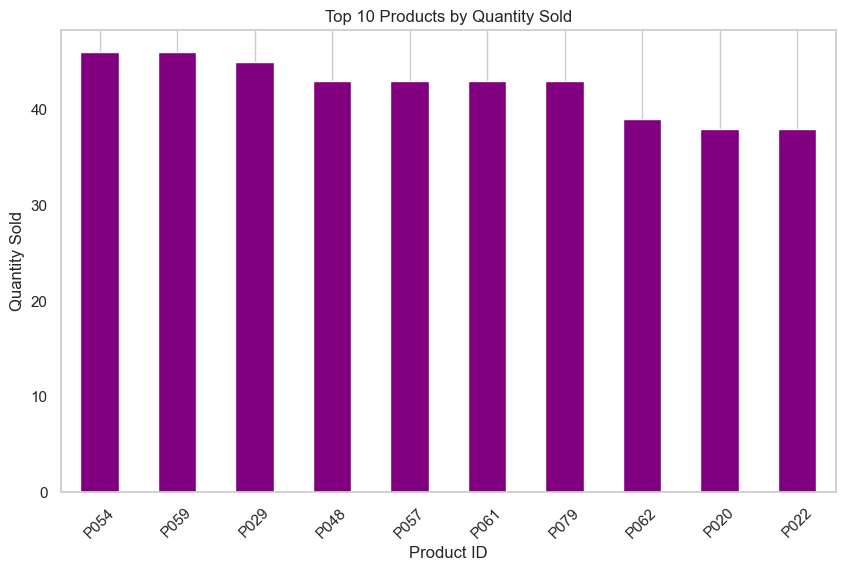

In [47]:
# Top products by quantity sold
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='purple')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

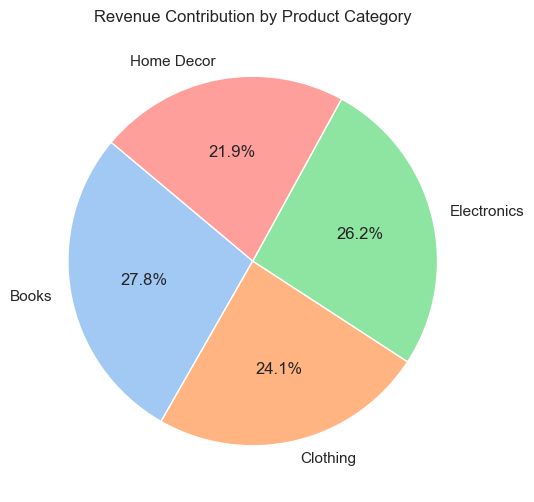

In [48]:
# Revenue contribution by product category
revenue_by_category = transactions_df.merge(products_df, on='ProductID').groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Revenue Contribution by Product Category")
plt.ylabel("")  # Hide y-axis label for pie chart
plt.show()